In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import sqlite3
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from config import settings
from data import AlphaVantageAPI, SQLRepository

In [3]:
av = AlphaVantageAPI()


In [4]:
ticker = "IBM"
IBM_records = av.get_daily(ticker)
IBM_records

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
date,,,,,,,,
2023-04-11,130.58,131.1050,130.180,130.42,130.420000,3132430.0,0.0,1.0
2023-04-10,129.83,131.0800,129.240,131.03,131.030000,2614402.0,0.0,1.0
2023-04-06,132.16,132.6000,130.315,130.50,130.500000,3050581.0,0.0,1.0
2023-04-05,131.37,132.6100,131.370,132.14,132.140000,2898759.0,0.0,1.0
2023-04-04,131.99,132.1499,130.890,131.60,131.600000,3382783.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,92.75,92.9400,90.190,90.25,49.122781,13737600.0,0.0,1.0
1999-11-04,94.44,94.4400,90.000,91.56,49.835810,16697600.0,0.0,1.0
1999-11-03,95.87,95.9400,93.500,94.37,51.365284,10369100.0,0.0,1.0


In [5]:
connection = sqlite3.connect(database = settings.db_name, check_same_thread = False)

In [6]:
print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


In [7]:
repo = SQLRepository(connection = connection)

In [8]:
response = repo.insert_table(table_name=ticker, records=IBM_records, if_exists="replace")
response

{'transaction_successful': True, 'records_inserted': 5898}

In [9]:
results = connection.execute("SELECT name FROM sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%';").fetchall()

# print the table names
for row in results:
    print(row[0])


IBM


In [10]:
df_IBM = repo.read_table(table_name=ticker, limit=2500)
df_IBM.info()
df_IBM.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2023-04-11 to 2013-05-07
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               2500 non-null   float64
 1   high               2500 non-null   float64
 2   low                2500 non-null   float64
 3   close              2500 non-null   float64
 4   adjusted close     2500 non-null   float64
 5   volume             2500 non-null   float64
 6   dividend amount    2500 non-null   float64
 7   split coefficient  2500 non-null   float64
dtypes: float64(8)
memory usage: 175.8 KB


,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
date,,,,,,,,
2023-04-11,130.58,131.1050,130.180,130.42,130.42,3132430.0,0.0,1.0
2023-04-10,129.83,131.0800,129.240,131.03,131.03,2614402.0,0.0,1.0
2023-04-06,132.16,132.6000,130.315,130.50,130.50,3050581.0,0.0,1.0
2023-04-05,131.37,132.6100,131.370,132.14,132.14,2898759.0,0.0,1.0
2023-04-04,131.99,132.1499,130.890,131.60,131.60,3382783.0,0.0,1.0


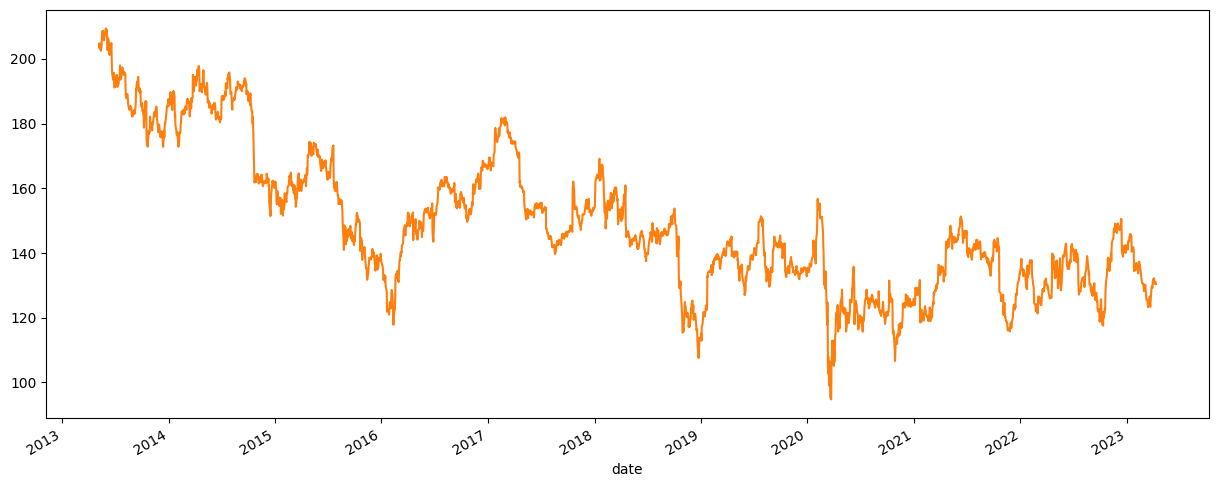

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
df_IBM["close"].plot(ax=ax, label="IBM",color = "C1");



In [12]:
# Sort DataFrame ascending by date
df_IBM.sort_index(ascending=True,inplace=True)

# Create "return" column
df_IBM["return"] = df_IBM["close"].pct_change() * 100

print("df_ambuja shape:", df_IBM.shape)
print(df_IBM.info())
df_IBM.head()

df_ambuja shape: (2500, 9)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2013-05-07 to 2023-04-11
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               2500 non-null   float64
 1   high               2500 non-null   float64
 2   low                2500 non-null   float64
 3   close              2500 non-null   float64
 4   adjusted close     2500 non-null   float64
 5   volume             2500 non-null   float64
 6   dividend amount    2500 non-null   float64
 7   split coefficient  2500 non-null   float64
 8   return             2499 non-null   float64
dtypes: float64(9)
memory usage: 195.3 KB
None


,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,return
date,,,,,,,,,
2013-05-07,202.81,203.73,201.65,203.63,130.582376,3451000.0,0.00,1.0,NaN
2013-05-08,202.94,204.85,202.51,204.82,131.954700,3601700.0,0.95,1.0,0.584393
2013-05-09,204.69,205.00,202.72,203.24,130.936789,3542300.0,0.00,1.0,-0.771409
2013-05-10,203.37,204.53,202.82,204.47,131.729213,3279200.0,0.00,1.0,0.605196
2013-05-13,204.18,204.47,202.22,202.47,130.440719,3648400.0,0.00,1.0,-0.978139


In [13]:
#Database Connection
connection = sqlite3.connect(settings.db_name, check_same_thread = False)
repo = SQLRepository(connection=connection)
df_IBM = repo.read_table(table_name="IBM",limit=2500)

def wrangle_data(ticker,n_observations):

    """Extract table data from database. Calculate returns.

    Parameters
    ----------
    ticker : str
        The ticker symbol of the stock (also table name in database).

    n_observations : int
        Number of observations to return.

    Returns
    -------
    pd.Series
        Name will be `"return"`. There will be no `NaN` values.
    """
    # Get table from database
    df = repo.read_table(table_name=ticker,limit=n_observations + 1)


    # Sort DataFrame ascending by date
    df.sort_index(ascending=True,inplace=True)

    # Create "return" column
    df["return"]= df["close"].pct_change() * 100

    # Return returns
    return df["return"].dropna()


In [14]:
y_ibm = wrangle_data(ticker="IBM", n_observations=2500)
y_ibm


date
2013-05-07    0.419173
2013-05-08    0.584393
2013-05-09   -0.771409
2013-05-10    0.605196
2013-05-13   -0.978139
                ...   
2023-04-04   -0.348327
2023-04-05    0.410334
2023-04-06   -1.241108
2023-04-10    0.406130
2023-04-11   -0.465542
Name: return, Length: 2500, dtype: float64

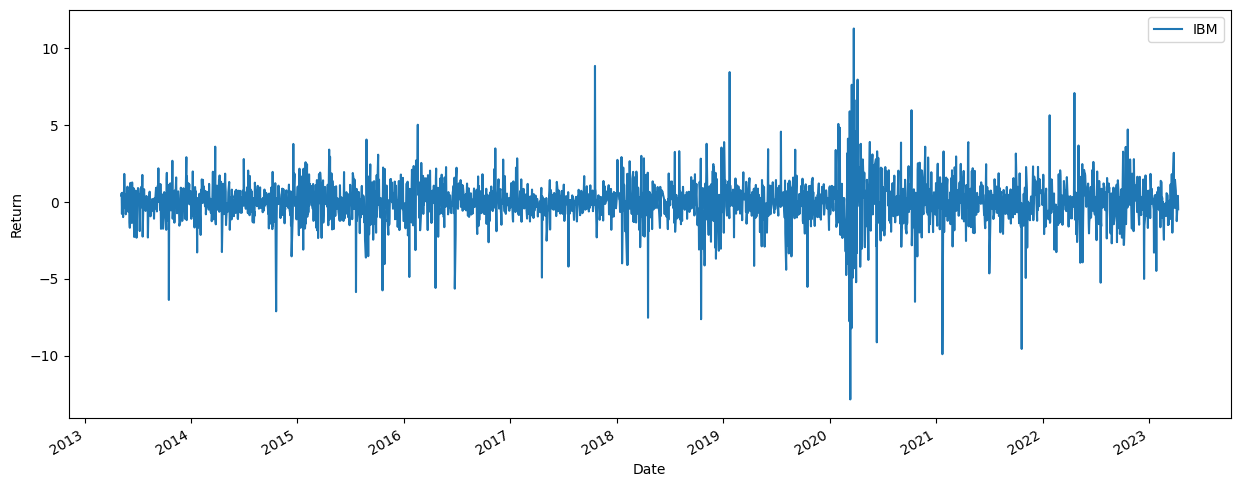

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for `df_suzlon` and `df_ambuja`
y_ibm.plot(ax=ax, label="IBM")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend();

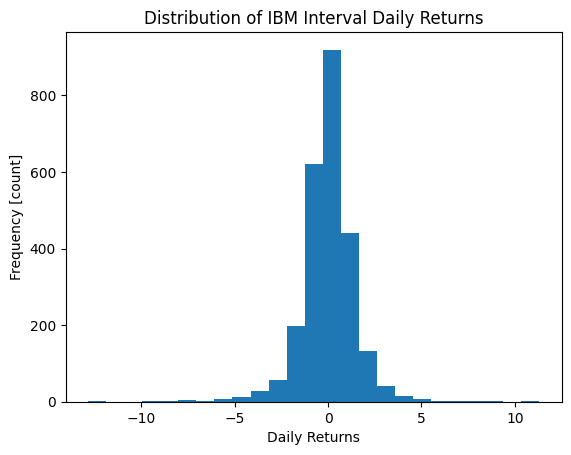

In [16]:

plt.hist(y_ibm,bins=25)

# Add axis labels
plt.xlabel("Daily Returns")
plt.ylabel("Frequency [count]")


# Add title
plt.title("Distribution of IBM Interval Daily Returns");


In [17]:
IBM_daily_volatility = y_ibm.std()
IBM_daily_volatility

1.4859144755158638

In [20]:
IBM_yearly_volatility= IBM_daily_volatility * np.sqrt(252)
IBM_yearly_volatility

23.5881610303557

In [21]:
IBM_rolling_50d_volatility = y_ibm.rolling(window=50).std().dropna()

print("rolling_50d_volatility type:", type(IBM_rolling_50d_volatility))
print("rolling_50d_volatility shape:", IBM_rolling_50d_volatility.shape)
IBM_rolling_50d_volatility.head()


rolling_50d_volatility type: <class 'pandas.core.series.Series'>
rolling_50d_volatility shape: (2451,)


date
2013-07-17    0.942694
2013-07-18    0.975945
2013-07-19    1.019495
2013-07-22    1.016404
2013-07-23    1.014576
Name: return, dtype: float64

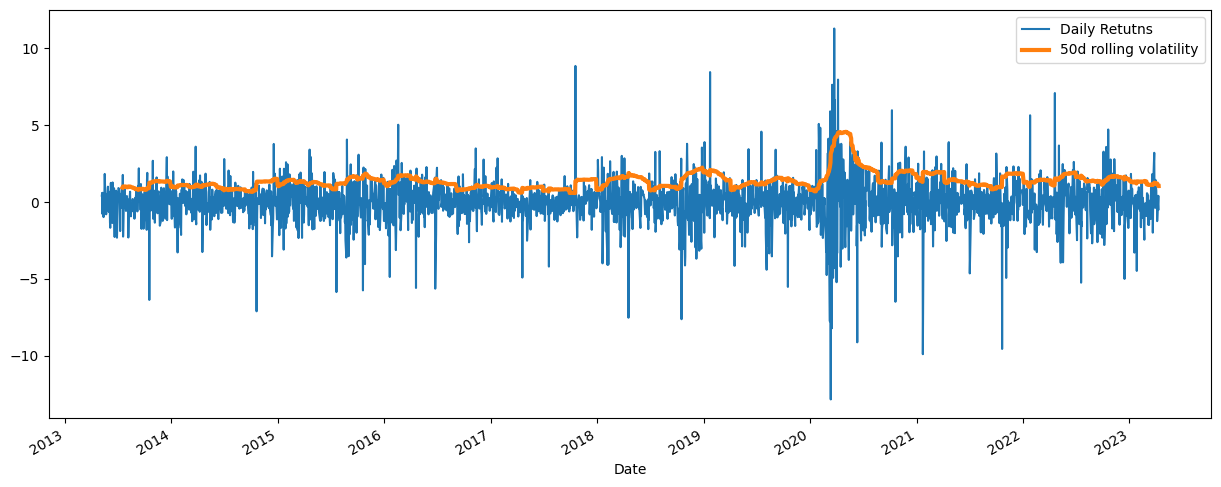

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

y_ibm.plot(ax=ax,label="Daily Retutns")


IBM_rolling_50d_volatility.plot(ax=ax,label="50d rolling volatility",linewidth=3)

plt.xlabel("Date")


plt.legend();

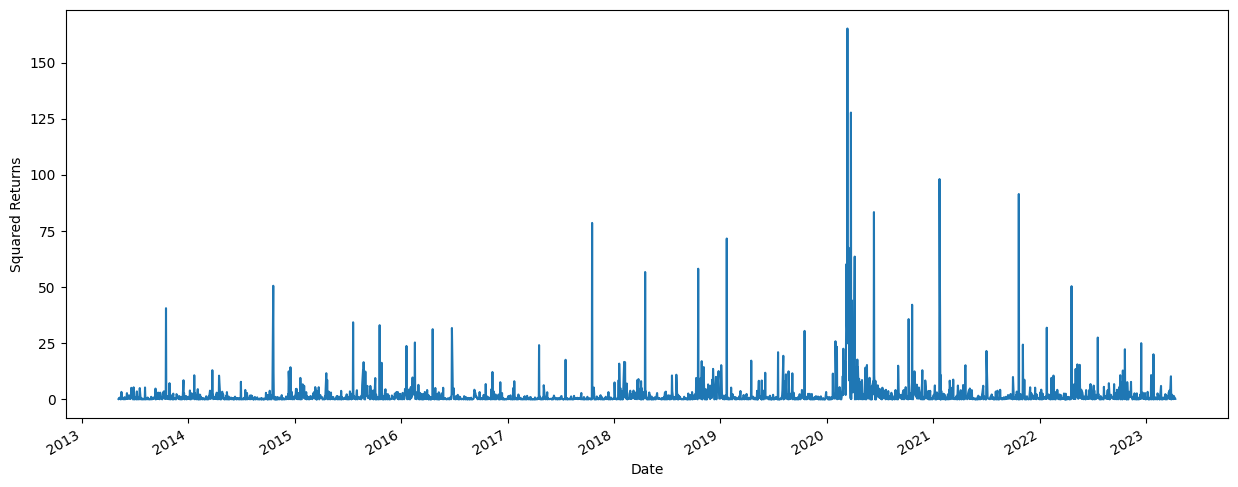

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot squared returns
(y_ibm ** 2).plot(ax=ax)

# Add axis labels
plt.xlabel("Date")
plt.ylabel("Squared Returns");

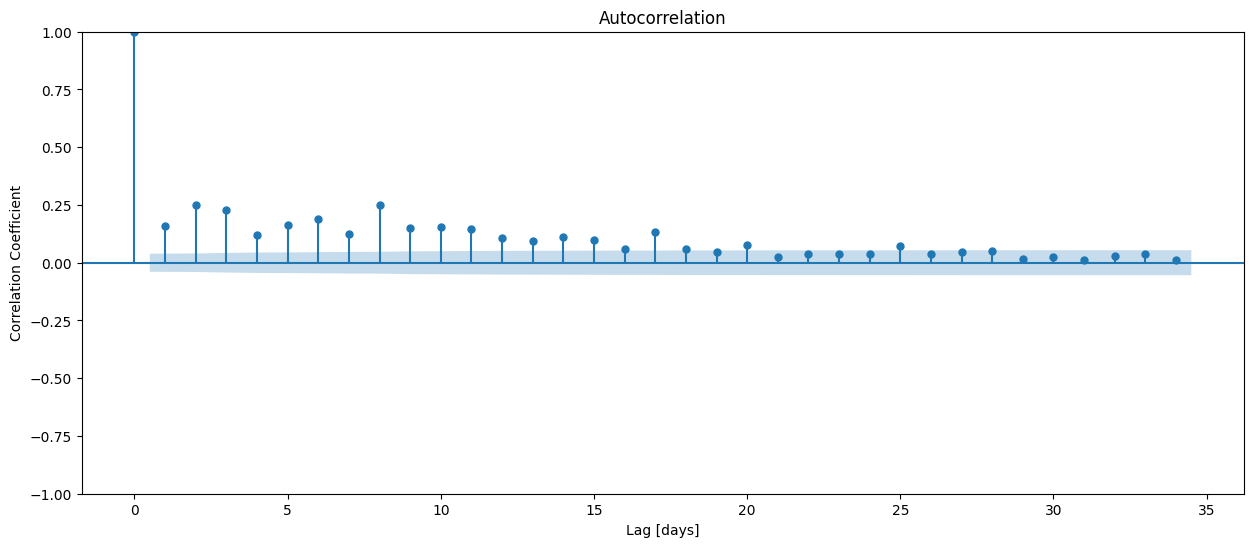

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared returns
plot_acf(y_ibm**2 ,ax=ax)

# Add axis labels
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");



/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


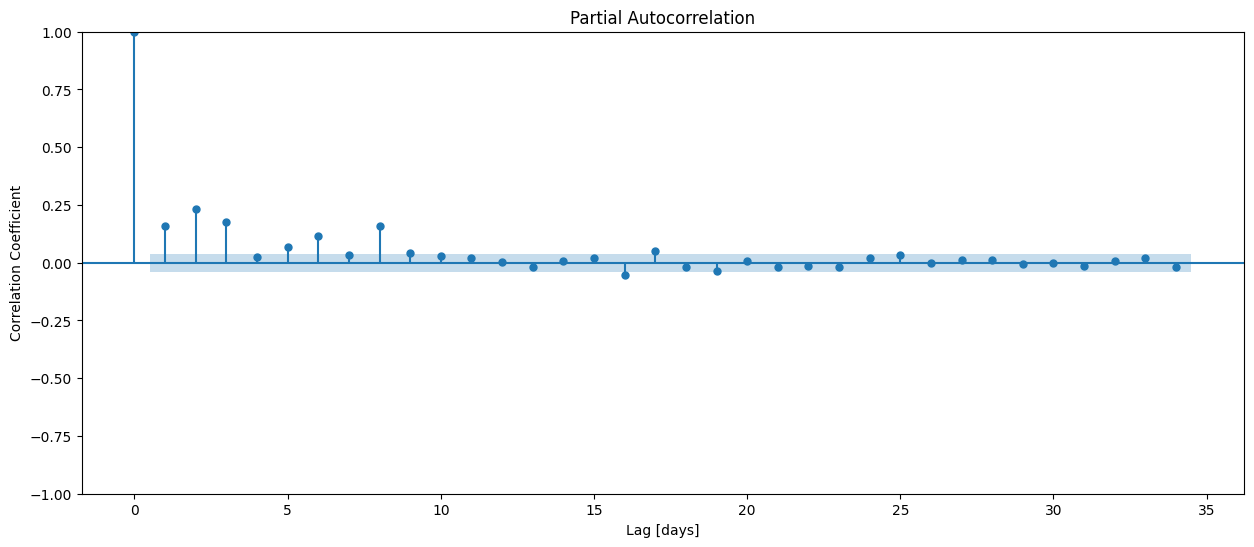

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared returns
plot_pacf(y_ibm**2 ,ax=ax)

# Add axis labels
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");